In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import date
from datetime import datetime
from dateutil import relativedelta
import math
import datetime
import matplotlib
import time
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

In [2]:
data = pd.read_csv("./marketing_campaign.csv")

In [3]:
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [4]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.shape

(2240, 29)

In [7]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
data.duplicated().sum()

0

# Observations :
    
1. Data contains 2240 rows and 29 columns
2. It has 1 float, 3 object and 25 int columns
3. Datetime columns have int datatype, need to fix the column
4. There are 24 missing values in Income column
5. There are no duplicate values within data

# DATA CLEANING & FEATURE CONSTRUCTION


In [9]:
data.isnull().sum() #no of missing values in each column

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#we can get the features which are having null values with conditon(null values >0 or >1 or anything)

[features for features in data.columns if data[features].isnull().sum()>0]



['Income']

# Outliers detection in income 

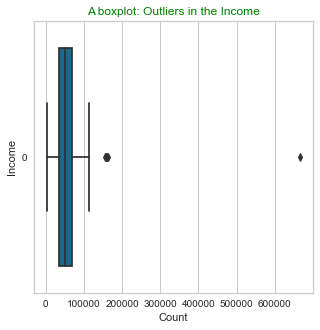

In [11]:
# check for outliers
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=data['Income'], orient="h")
plt.title('A boxplot: Outliers in the Income', color = 'green')
plt.xlabel('Count')
plt.ylabel('Income')
plt.show()

Filling the missing value in the income my median as outliers are present in income column

In [12]:
data['Income'].median()

51381.5

In [13]:
data['Income'] = data['Income'].fillna(data['Income'].median())
data.isna().any() 

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

Columns 'Z_CostContact' and 'Z_Revenue' which haven't been described by the data.

Dropping columns because they will not contribute anything in analysis or model building 

In [14]:
data = data.drop(['Z_CostContact', 'Z_Revenue'],axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


# Checking correlation between the attributes

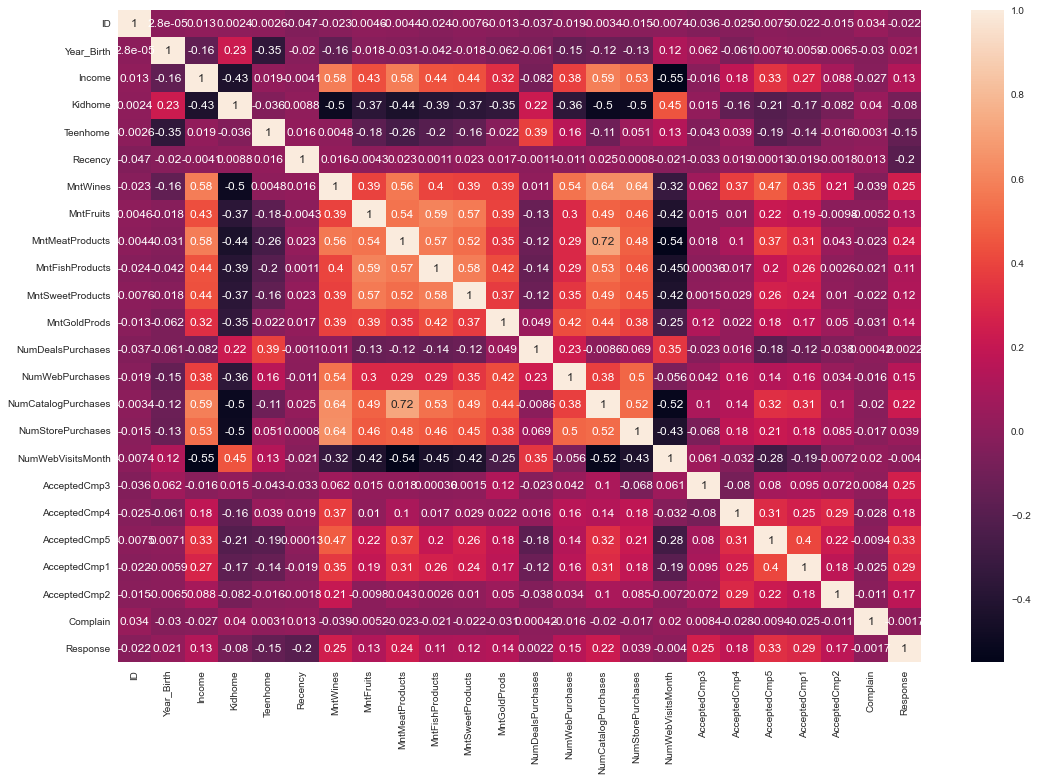

In [15]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), annot=True)
plt.show()

No two columns are too much correlated with each other so we can't drop any column on the basis of correlation.

# Checking for correlation by unstacking data

It is used to calculate how one variable is correlated/ dependent on other variable.

Extreme values signify high correlation. 

Multicollinear variables with correlation more than a threshold are usually dropped from the dataset.

In [16]:
# Check the Correlation Report
corr_data = data.corr()
corr_data.abs().unstack().sort_values(ascending=False)

ID                 ID                   1.000000
NumDealsPurchases  NumDealsPurchases    1.000000
Kidhome            Kidhome              1.000000
Teenhome           Teenhome             1.000000
Recency            Recency              1.000000
                                          ...   
AcceptedCmp3       MntFishProducts      0.000357
AcceptedCmp5       Recency              0.000129
Recency            AcceptedCmp5         0.000129
ID                 Year_Birth           0.000028
Year_Birth         ID                   0.000028
Length: 576, dtype: float64

Changing birth year to age, and Dt_customer to date time format and change it to customers_years, which means how many years has the customer been a customer.

In [17]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')


In [18]:
data['Age'] = (2015 - data['Year_Birth'])

In [19]:
def get_different_year():
    registration_year = data['Dt_Customer'].apply(lambda x: x.year)
    current_year = 2015
    return current_year - registration_year

data['Customer_Years'] = get_different_year()  # Number of years since customer registration

In [20]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Years
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,1,58,3
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,0,61,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,0,50,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,0,31,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,0,34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,0,48,2
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,0,69,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,0,34,1
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,0,59,1


# Combining different dataframe into a single column to reduce the number of dimension

Combining all expenses, accepted campaign  and purchases for each customers.

In [21]:
data['Total_Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +  data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [22]:
data['Total_Accepted_Cmp'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']

In [23]:
data['Total_Purchases'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']
 # Total number of purchases

In [24]:
# Total children living in the household
data["Children"] = data["Kidhome"] +  data["Teenhome"]

In [25]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,58,3,1617,1,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,61,1,27,0,6,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,50,2,776,0,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,31,1,53,0,8,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,34,1,422,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,48,2,1341,0,18,1
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,0,69,1,444,1,22,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,34,1,1241,1,19,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,59,1,843,0,23,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# Deleting some columns to reduce dimension and complexity of model

In [27]:
columns_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data=data.drop(columns=columns_del,axis=1)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,58,3,1617,1,25,0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,61,1,27,0,6,2
2,4141,1965,Graduation,Together,71613.0,2013-08-21,26,0,50,2,776,0,21,0
3,6182,1984,Graduation,Together,26646.0,2014-02-10,26,0,31,1,53,0,8,1
4,5324,1981,PhD,Married,58293.0,2014-01-19,94,0,34,1,422,0,19,1


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2240 non-null   int64         
 1   Year_Birth          2240 non-null   int64         
 2   Education           2240 non-null   object        
 3   Marital_Status      2240 non-null   object        
 4   Income              2240 non-null   float64       
 5   Dt_Customer         2240 non-null   datetime64[ns]
 6   Recency             2240 non-null   int64         
 7   Complain            2240 non-null   int64         
 8   Age                 2240 non-null   int64         
 9   Customer_Years      2240 non-null   int64         
 10  Total_Expenses      2240 non-null   int64         
 11  Total_Accepted_Cmp  2240 non-null   int64         
 12  Total_Purchases     2240 non-null   int64         
 13  Children            2240 non-null   int64       

Count of unique categories present in the Marital_Status and Education

In [29]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

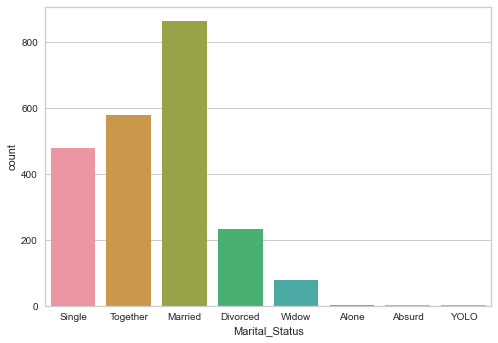

In [30]:
sns.countplot(data.Marital_Status)
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

# Grouping Married and Together as relationship. Whereas Divorced, Widow, Alone, YOLO, Absurd as Single

In [31]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

In [32]:
data['Marital_Status'].value_counts()

relationship    1444
Single           796
Name: Marital_Status, dtype: int64

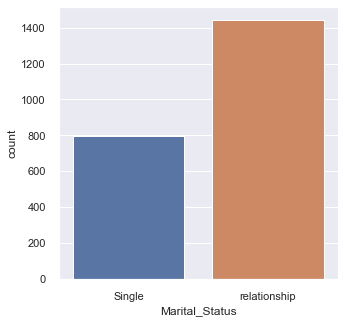

In [34]:
sns.countplot(data.Marital_Status)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

In [35]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

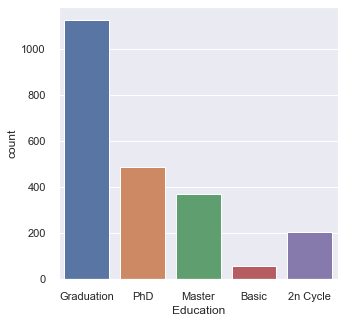

In [36]:
sns.countplot(data.Education)
sns.set(rc={'figure.figsize':(10,7)})
plt.show()

In [37]:
data['Education'] = data['Education'].replace(['PhD','2n Cycle', 'Master'],'Postgraduation')
data['Education'] = data['Education'].replace(['Graduation'],'Graduation')
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduation')

In [38]:
data['Education'].value_counts()

Graduation         1127
Postgraduation     1059
Undergraduation      54
Name: Education, dtype: int64

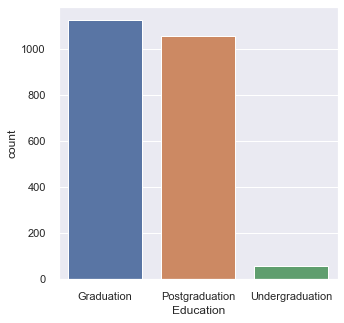

In [40]:
sns.countplot(data.Education)
sns.set(rc={'figure.figsize':(5,5)})
plt.show()

In [41]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,5524,1957,Graduation,Single,58138.0,2012-09-04,58,0,58,3,1617,1,25,0
1,2174,1954,Graduation,Single,46344.0,2014-03-08,38,0,61,1,27,0,6,2
2,4141,1965,Graduation,relationship,71613.0,2013-08-21,26,0,50,2,776,0,21,0
3,6182,1984,Graduation,relationship,26646.0,2014-02-10,26,0,31,1,53,0,8,1
4,5324,1981,Postgraduation,relationship,58293.0,2014-01-19,94,0,34,1,422,0,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,relationship,61223.0,2013-06-13,46,0,48,2,1341,0,18,1
2236,4001,1946,Postgraduation,relationship,64014.0,2014-06-10,56,0,69,1,444,1,22,3
2237,7270,1981,Graduation,Single,56981.0,2014-01-25,91,0,34,1,1241,1,19,0
2238,8235,1956,Postgraduation,relationship,69245.0,2014-01-24,8,0,59,1,843,0,23,1


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  2240 non-null   int64         
 1   Year_Birth          2240 non-null   int64         
 2   Education           2240 non-null   object        
 3   Marital_Status      2240 non-null   object        
 4   Income              2240 non-null   float64       
 5   Dt_Customer         2240 non-null   datetime64[ns]
 6   Recency             2240 non-null   int64         
 7   Complain            2240 non-null   int64         
 8   Age                 2240 non-null   int64         
 9   Customer_Years      2240 non-null   int64         
 10  Total_Expenses      2240 non-null   int64         
 11  Total_Accepted_Cmp  2240 non-null   int64         
 12  Total_Purchases     2240 non-null   int64         
 13  Children            2240 non-null   int64       

In [43]:
data=data.drop(columns=["ID", "Dt_Customer", "Year_Birth", "Recency", "Complain"],axis=1)
data.shape

(2240, 9)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2240 non-null   object 
 1   Marital_Status      2240 non-null   object 
 2   Income              2240 non-null   float64
 3   Age                 2240 non-null   int64  
 4   Customer_Years      2240 non-null   int64  
 5   Total_Expenses      2240 non-null   int64  
 6   Total_Accepted_Cmp  2240 non-null   int64  
 7   Total_Purchases     2240 non-null   int64  
 8   Children            2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES WITH RESPECT TO EDUCATION

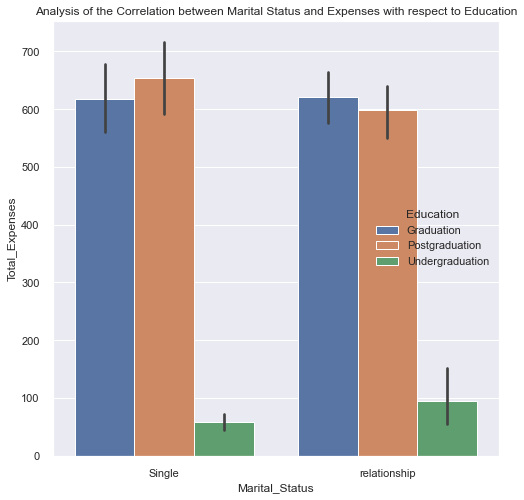

In [45]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Marital_Status'], y=data['Total_Expenses'], hue = data["Education"])
plt.title("Analysis of the Correlation between Marital Status and Expenses with respect to Education")
plt.show()

# ANALYSIS OF THE CORRELATION BETWEEN MARITAL STATUS AND EXPENSES

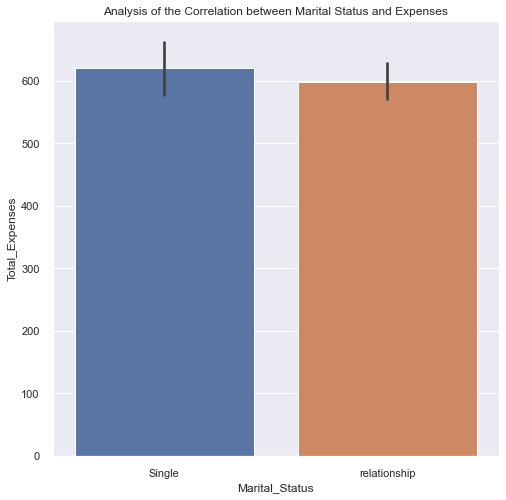

In [46]:
plt.figure(figsize=(8,8))
sns.barplot(x=data['Marital_Status'], y=data['Total_Expenses'])
plt.title("Analysis of the Correlation between Marital Status and Expenses")
plt.show()

# ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO MARITAL STATUS

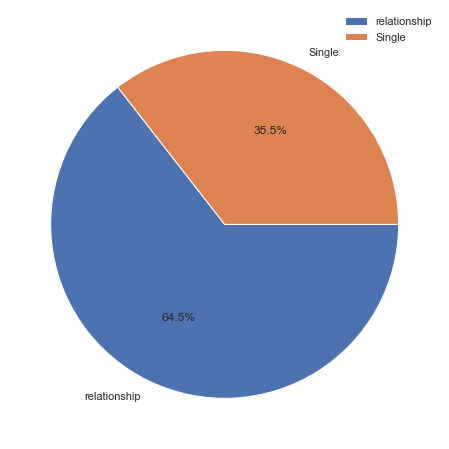

In [47]:
plt.figure(figsize=(8,8))
plt.pie(data["Marital_Status"].value_counts(), labels = ["relationship", "Single"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

35% of the customer are single whereas more 64% are in relationship.

# ANALYSIS OF THE DISTRIBUTION OF PEOPLE ACCORDING TO EDUCATION

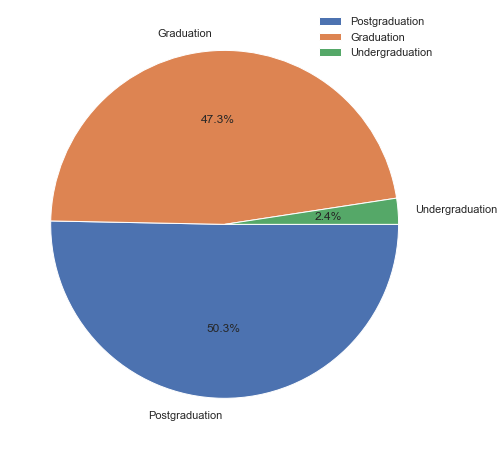

In [48]:
plt.figure(figsize=(8,8))
plt.pie(data["Education"].value_counts(), labels = ["Postgraduation", "Graduation","Undergraduation"], autopct='%1.1f%%', counterclock=False)
plt.legend()
plt.show()

50% customer are from Postgraduation background.

47% customer are from Graduation background.

3% customer are from Undergraduation background.

# DISTRIBUTION OF EXPENSES BASED ON EDUCATION

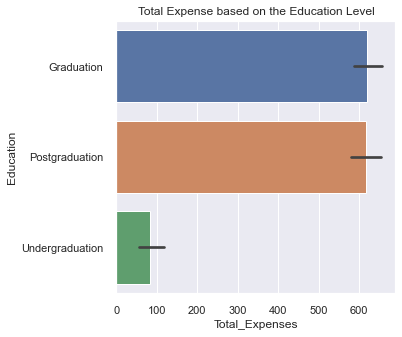

In [49]:
sns.barplot(x = data['Total_Expenses'],y = data['Education']);
plt.title('Total Expense based on the Education Level');
plt.show()

# INCOME BASED ON EDUCATION LEVEL

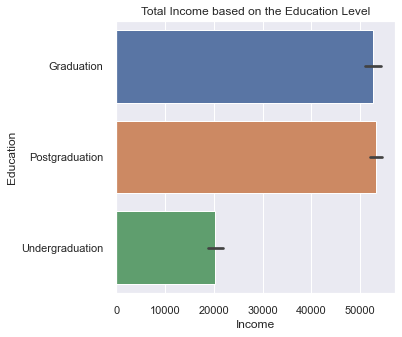

In [50]:
sns.barplot(x = data['Income'],y = data['Education']);
plt.title('Total Income based on the Education Level');
plt.show()

In [51]:
final_df = data.copy()

In [52]:
final_df

,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,Graduation,Single,58138.0,58,3,1617,1,25,0
1,Graduation,Single,46344.0,61,1,27,0,6,2
2,Graduation,relationship,71613.0,50,2,776,0,21,0
3,Graduation,relationship,26646.0,31,1,53,0,8,1
4,Postgraduation,relationship,58293.0,34,1,422,0,19,1
...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,48,2,1341,0,18,1
2236,Postgraduation,relationship,64014.0,69,1,444,1,22,3
2237,Graduation,Single,56981.0,34,1,1241,1,19,0
2238,Postgraduation,relationship,69245.0,59,1,843,0,23,1


In [53]:
final_df.describe()

,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,46.194196,1.971875,605.798214,0.446875,14.862054,0.950446
std,25037.955891,11.984069,0.684554,602.249288,0.890543,7.677173,0.751803
min,1730.000000,19.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,35538.750000,38.000000,2.000000,68.750000,0.000000,8.000000,0.000000
50%,51381.500000,45.000000,2.000000,396.000000,0.000000,15.000000,1.000000
75%,68289.750000,56.000000,2.000000,1045.500000,1.000000,21.000000,1.000000
max,666666.000000,122.000000,3.000000,2525.000000,5.000000,44.000000,3.000000


# OUTLIERS DETECTION

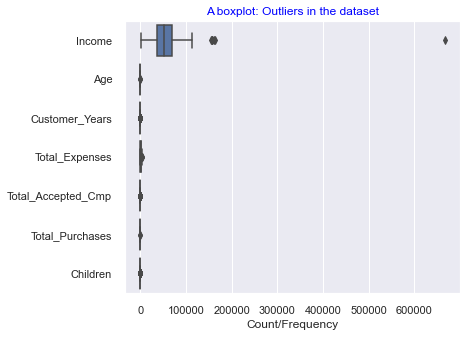

In [54]:
# check for outliers
plt.figure(figsize=(6,5))
otb = sns.boxplot(data=final_df , orient="h")
plt.title('A boxplot: Outliers in the dataset', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show()

In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2240 non-null   object 
 1   Marital_Status      2240 non-null   object 
 2   Income              2240 non-null   float64
 3   Age                 2240 non-null   int64  
 4   Customer_Years      2240 non-null   int64  
 5   Total_Expenses      2240 non-null   int64  
 6   Total_Accepted_Cmp  2240 non-null   int64  
 7   Total_Purchases     2240 non-null   int64  
 8   Children            2240 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 157.6+ KB


In [56]:
final_df.describe()

,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,46.194196,1.971875,605.798214,0.446875,14.862054,0.950446
std,25037.955891,11.984069,0.684554,602.249288,0.890543,7.677173,0.751803
min,1730.000000,19.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,35538.750000,38.000000,2.000000,68.750000,0.000000,8.000000,0.000000
50%,51381.500000,45.000000,2.000000,396.000000,0.000000,15.000000,1.000000
75%,68289.750000,56.000000,2.000000,1045.500000,1.000000,21.000000,1.000000
max,666666.000000,122.000000,3.000000,2525.000000,5.000000,44.000000,3.000000


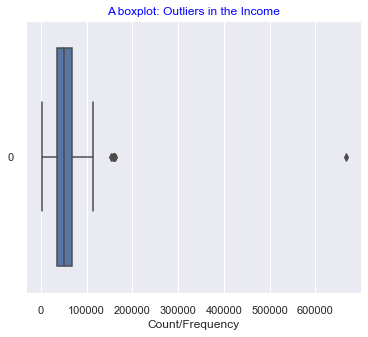

In [57]:
# check for outliers
plt.figure(figsize=(6,5))
otb = sns.boxplot(data=final_df['Income'] , orient="h")
plt.title('A boxplot: Outliers in the Income', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show()

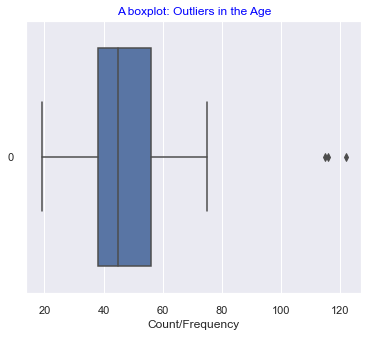

In [58]:
# check for outliers
plt.figure(figsize=(6,5))
otb = sns.boxplot(data=final_df['Age'] , orient="h")
plt.title('A boxplot: Outliers in the Age', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show()

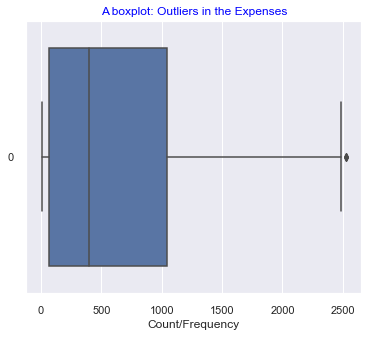

In [59]:
# check for outliers
plt.figure(figsize=(6,5))
otb = sns.boxplot(data=final_df['Total_Expenses'] , orient="h")
plt.title('A boxplot: Outliers in the Expenses', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show()

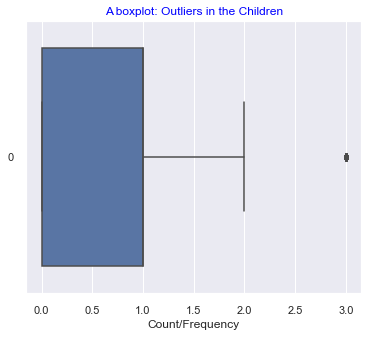

In [60]:
# check for outliers
plt.figure(figsize=(6,5))
otb = sns.boxplot(data=final_df['Children'] , orient="h")
plt.title('A boxplot: Outliers in the Children', color = 'blue')
plt.xlabel('Count/Frequency')
plt.show()

In [61]:
num_col = final_df.select_dtypes(include = np.number).columns

In [62]:
num_col

Index(['Income', 'Age', 'Customer_Years', 'Total_Expenses',
       'Total_Accepted_Cmp', 'Total_Purchases', 'Children'],
      dtype='object')

In [63]:
for col in num_col:
    q1 = final_df[col].quantile(0.25)
    q3 = final_df[col].quantile(0.75)
    iqr = q3-q1
    lower_range = q1-(1.5*iqr)
    upper_range = q3+(1.5*iqr)
    for ind in final_df[col].index:
        if final_df.loc[ind,col]>upper_range:
            final_df.loc[ind,col]=math.ceil(upper_range)
        elif final_df.loc[ind,col]<lower_range:
            final_df.loc[ind,col]=math.ceil(lower_range)
        else:
            pass
print("Outliers have been taken care by using Winsorization or trimming Method")

Outliers have been taken care by using Winsorization or trimming Method


In [64]:
final_df

,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,Graduation,Single,58138.0,58,2,1617,1,25,0
1,Graduation,Single,46344.0,61,2,27,0,6,2
2,Graduation,relationship,71613.0,50,2,776,0,21,0
3,Graduation,relationship,26646.0,31,2,53,0,8,1
4,Postgraduation,relationship,58293.0,34,2,422,0,19,1
...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,48,2,1341,0,18,1
2236,Postgraduation,relationship,64014.0,69,2,444,1,22,3
2237,Graduation,Single,56981.0,34,2,1241,1,19,0
2238,Postgraduation,relationship,69245.0,59,2,843,0,23,1


In [65]:
final_df.describe()

,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
count,2240.000000,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,51865.877232,46.147768,2.0,605.779911,0.421875,14.859821,0.950446
std,20936.113211,11.771725,0.0,602.191148,0.794220,7.669187,0.751803
min,1730.000000,19.000000,2.0,5.000000,0.000000,0.000000,0.000000
25%,35538.750000,38.000000,2.0,68.750000,0.000000,8.000000,0.000000
50%,51381.500000,45.000000,2.0,396.000000,0.000000,15.000000,1.000000
75%,68289.750000,56.000000,2.0,1045.500000,1.000000,21.000000,1.000000
max,117417.000000,83.000000,2.0,2511.000000,3.000000,41.000000,3.000000


# FEATURE TRANSFORMATION

# LABEL ENCODING

In [66]:
category = []
for i in final_df.columns:
    if (final_df[i].dtypes == "object"):
        category.append(i)

print(category)

['Education', 'Marital_Status']


In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [68]:
label_encode = LabelEncoder()
for i in category:
    final_df[i]=final_df[[i]].apply(label_encode.fit_transform)

In [69]:
final_df_model = final_df.copy()

In [70]:
final_df_model

,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
0,0,0,58138.0,58,2,1617,1,25,0
1,0,0,46344.0,61,2,27,0,6,2
2,0,1,71613.0,50,2,776,0,21,0
3,0,1,26646.0,31,2,53,0,8,1
4,1,1,58293.0,34,2,422,0,19,1
...,...,...,...,...,...,...,...,...,...
2235,0,1,61223.0,48,2,1341,0,18,1
2236,1,1,64014.0,69,2,444,1,22,3
2237,0,0,56981.0,34,2,1241,1,19,0
2238,1,1,69245.0,59,2,843,0,23,1


In [71]:
final_df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Education           2240 non-null   int32  
 1   Marital_Status      2240 non-null   int32  
 2   Income              2240 non-null   float64
 3   Age                 2240 non-null   int64  
 4   Customer_Years      2240 non-null   int64  
 5   Total_Expenses      2240 non-null   int64  
 6   Total_Accepted_Cmp  2240 non-null   int64  
 7   Total_Purchases     2240 non-null   int64  
 8   Children            2240 non-null   int64  
dtypes: float64(1), int32(2), int64(6)
memory usage: 140.1 KB


In [72]:
final_df_model.describe()

,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.000000,2240.000000,2240.000000,2240.000000
mean,0.520982,0.644643,51865.877232,46.147768,2.0,605.779911,0.421875,14.859821,0.950446
std,0.545809,0.478728,20936.113211,11.771725,0.0,602.191148,0.794220,7.669187,0.751803
min,0.000000,0.000000,1730.000000,19.000000,2.0,5.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35538.750000,38.000000,2.0,68.750000,0.000000,8.000000,0.000000
50%,0.000000,1.000000,51381.500000,45.000000,2.0,396.000000,0.000000,15.000000,1.000000
75%,1.000000,1.000000,68289.750000,56.000000,2.0,1045.500000,1.000000,21.000000,1.000000
max,2.000000,1.000000,117417.000000,83.000000,2.0,2511.000000,3.000000,41.000000,3.000000


In [81]:
pip install threadpoolctl

Note: you may need to restart the kernel to use updated packages.


In [64]:
pip install threadpoolctl==3.1.0

Note: you may need to restart the kernel to use updated packages.


In [220]:
pip install numpy==1.21.4

Note: you may need to restart the kernel to use updated packages.


In [221]:
pip install scikit-learn==1.1.3

Note: you may need to restart the kernel to use updated packages.


In [216]:
pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# CLUSTERING

# The KElbowVisualizer implements the “elbow” method to select the optimal number of clusters by fitting the model with a range of values for K.

Elbow Method to determine the number of clusters to be formed:


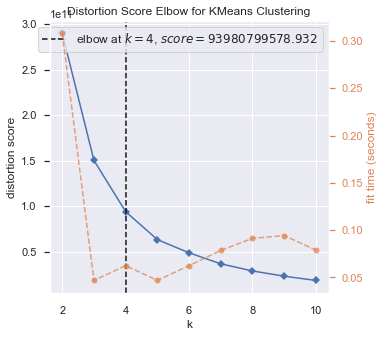

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# Elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=35), k=10)
Elbow_M.fit(final_df_model)
Elbow_M.show()

# K-MEANS CLUSTERING

# Model Building

In [74]:
# Training a predicting using K-Means Algorithm.
# k = 4
kmeans=KMeans(n_clusters=4, random_state=42).fit(final_df_model)
pred=kmeans.predict(final_df_model)


# Appending those cluster value into main dataframe

final_df_model['cluster'] = pred + 1

In [75]:
final_df_model

,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children,cluster
0,0,0,58138.0,58,2,1617,1,25,0,4
1,0,0,46344.0,61,2,27,0,6,2,1
2,0,1,71613.0,50,2,776,0,21,0,4
3,0,1,26646.0,31,2,53,0,8,1,3
4,1,1,58293.0,34,2,422,0,19,1,4
...,...,...,...,...,...,...,...,...,...,...
2235,0,1,61223.0,48,2,1341,0,18,1,4
2236,1,1,64014.0,69,2,444,1,22,3,4
2237,0,0,56981.0,34,2,1241,1,19,0,4
2238,1,1,69245.0,59,2,843,0,23,1,4


In [76]:
final_df_model['cluster'].value_counts()

1    692
4    634
3    466
2    448
Name: cluster, dtype: int64

In [77]:
final_df_model['Education'] = data['Education']
final_df_model['Marital_Status'] = data['Marital_Status']

In [78]:
final_df_model


,Education,Marital_Status,Income,Age,Customer_Years,Total_Expenses,Total_Accepted_Cmp,Total_Purchases,Children,cluster
0,Graduation,Single,58138.0,58,2,1617,1,25,0,4
1,Graduation,Single,46344.0,61,2,27,0,6,2,1
2,Graduation,relationship,71613.0,50,2,776,0,21,0,4
3,Graduation,relationship,26646.0,31,2,53,0,8,1,3
4,Postgraduation,relationship,58293.0,34,2,422,0,19,1,4
...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,48,2,1341,0,18,1,4
2236,Postgraduation,relationship,64014.0,69,2,444,1,22,3,4
2237,Graduation,Single,56981.0,34,2,1241,1,19,0,4
2238,Postgraduation,relationship,69245.0,59,2,843,0,23,1,4


Customers_Clusters --> csv file for customer clusters 

In [79]:
final_df_model.to_csv('Customers_Clusters.csv', index=False) # csv file for customer clusters 

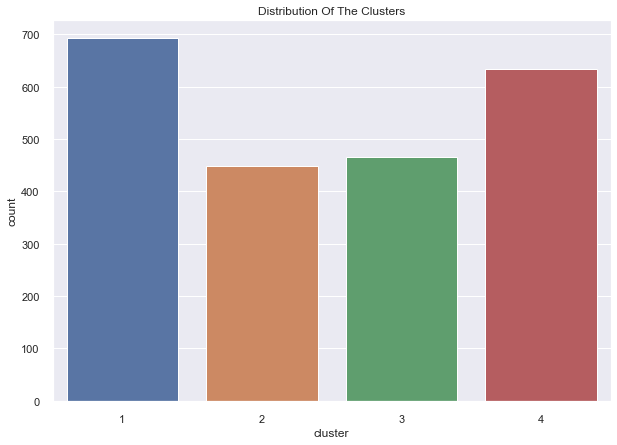

In [80]:
# count plot to see number of customers in each cluster
plt.figure(figsize=(10, 7))
clustplt = sns.countplot(x=final_df_model["cluster"])
clustplt.set_title("Distribution Of The Clusters")
plt.show()

1. Cluster 1 has large number of customers among all the clusters

2. Cluster 2 has least amount of customers

3. Cluster 4 has nearly same number of customers as 1

4. Cluster 3 has nearly same number of customers as 2



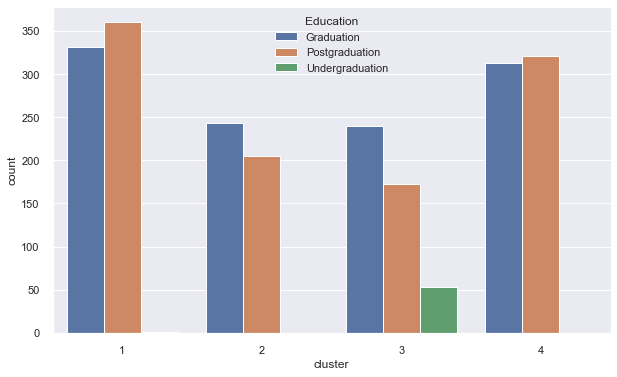

In [81]:
# Education level of customers from each cluster

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=final_df_model, hue='Education')
plt.show()

1. Cluster 1 is mostly consist of Graduate and Post graduate customers and 1or2 Undergraduates

2. Cluster 2 has only Graduate and Post graduate customers

3. Cluster 3 has most number of graduates and post graduates and very few undergraduates

4. Cluster 4 has only Graduate and Post graduate customers, similar to cluster 1

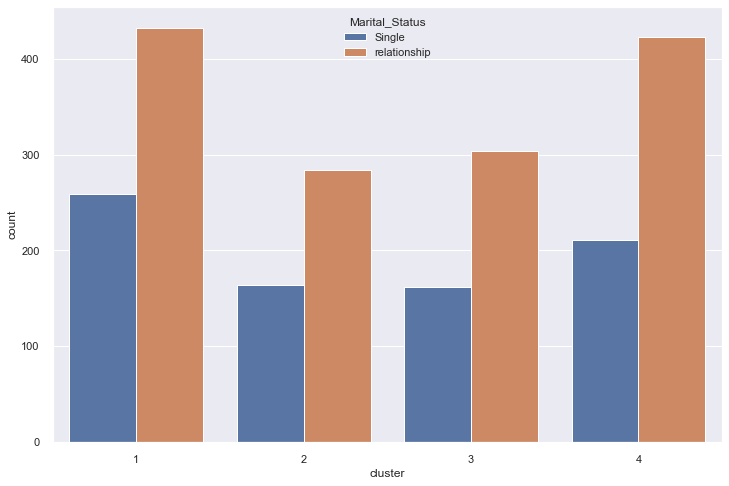

In [82]:

# Marital Status of customers from each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=final_df_model, hue='Marital_Status')
plt.show()

1. Similar trend among each cluster. All clusters consists of customers who are In-relationship and who are single.

2. All clusters have more number of customers who are In-relationship.

3. Cluster 1 has more number of customers, who are In-relationship and who are single as compared to others.

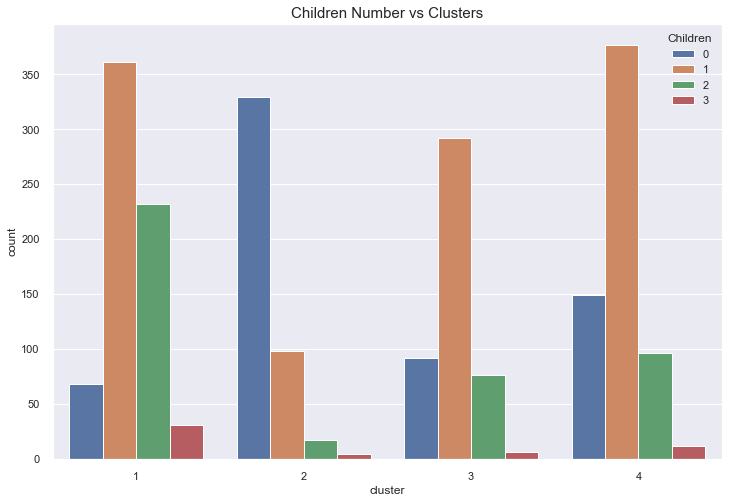

In [83]:

# No of Childrens from each cluster
plt.figure(figsize=(12, 8))
sns.countplot(x='cluster', data=final_df_model, hue='Children')
plt.title("Children Number vs Clusters", size=15)
plt.show()

1. In Cluster 1, most customers have 1 and 2 children, some have 3 and few have 0 children.
2. In Cluster 2, most customers with no children. Hoever there are few with 1,2,3 children.
3. In Cluster 3, largly consist of customers having 1 child. Very few have 3 children and remaining have 0 or 2 children.
4. In Cluster 4, most customers have 1 children, some have 2,0 and few have 3 children.




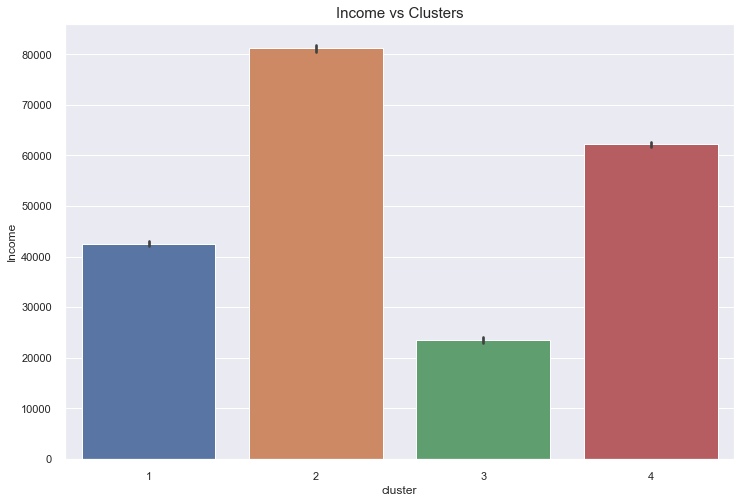

In [84]:
# Income of customers with in a clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=final_df_model["cluster"], y=final_df_model["Income"])
plt.title("Income vs Clusters", size=15)
plt.show()

1. Even the number of customers in cluster 2 were very less than all clusters, still the income of customers within cluster 2 is more than any other cluster. 
2. Cluster 4 customer has more income than cluster 1 despite the fact that cluster 1 has maximum number of customers than any other cluster.
3. Cluster 3 customer has less income than any other clusters

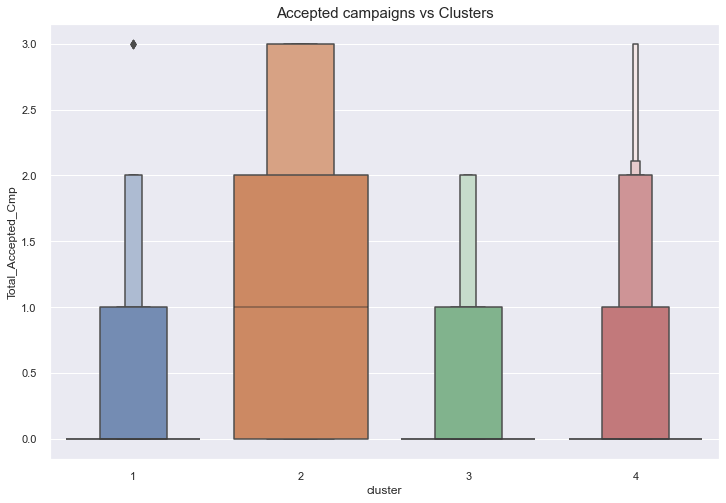

In [85]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=final_df_model["cluster"], y=final_df_model["Total_Accepted_Cmp"])
plt.title("Accepted campaigns vs Clusters", size=15)
plt.show()

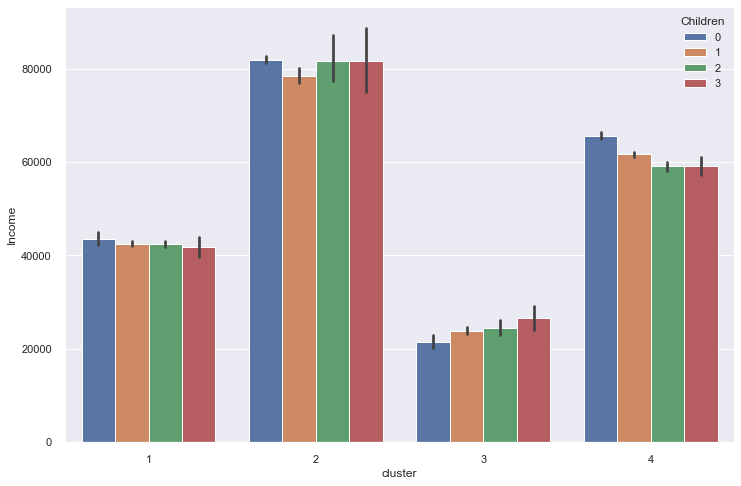

In [86]:
# Income of customers in each clusters depending on the number of children they have in household
plt.figure(figsize=(12, 8))
sns.barplot(x=final_df_model["cluster"], y=final_df_model["Income"], hue=final_df_model['Children'])
plt.show()

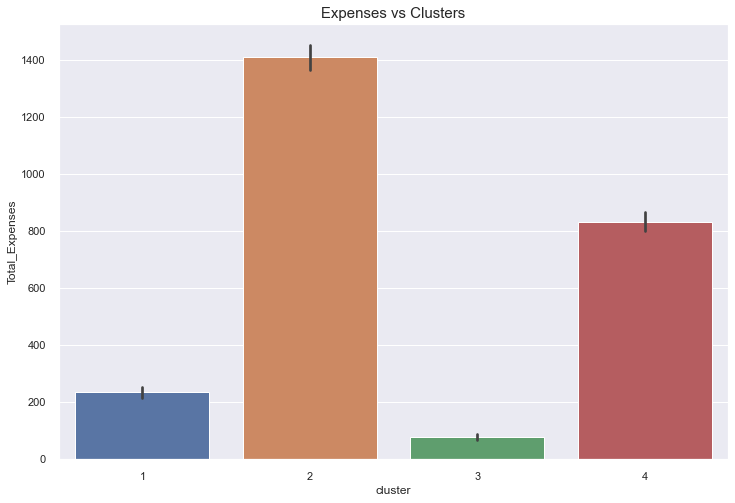

In [87]:
# Expenses of customers with in a clusters
plt.figure(figsize=(12, 8))
sns.barplot(x=final_df_model["cluster"], y=final_df_model["Total_Expenses"])
plt.title("Expenses vs Clusters", size=15)
plt.show()

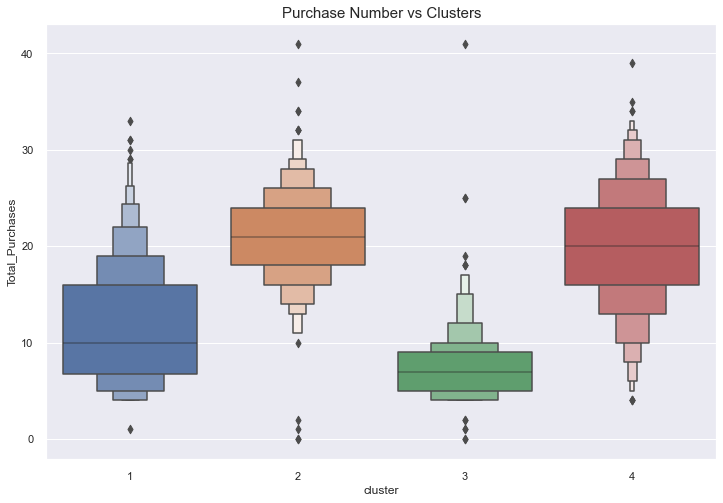

In [88]:
plt.figure(figsize=(12, 8))
sns.boxenplot(x=final_df_model["cluster"], y=final_df_model["Total_Purchases"])
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

1. Cluster 3 does the least shopping.
2. Clusters 1,2 and 4 does the most shopping

# CUSTOMER PROFILING

Cluster 2
1. Well Educated
2. Mostly No children
3. High Income
4. Least number of customers
5. High Expenditure
6. More shopping
7. Positive reply to campaigns

Cluster 4
1. Good number of customers
2. Graduates & Post Graduates
3. Mostly Has 1 or 0 children
4. Second Highest Income
5. Above Average expenditure
6. High number of purchases
7. Likes to claim deals

Cluster 3
1. Least number of customers
2. Graduates undergraduates & post graduates
3. Has 1,2 children
4. Low Income
5. Low expenditure
6. Less shopping
7. Have accepted few campaigns and deals


Cluster 1
1. Most number of customers
2. Graduates and  post graduates
3. Average Income
4. Has all groups of children
5. less expenditure
6. Average shopping
7. Have accepted few campaigns and deals



In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
category = []
for i in final_df_model.columns:
    if (final_df_model[i].dtypes == "object"):
        category.append(i)

print(category)

['Education', 'Marital_Status']


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing 

In [92]:
label_encode = LabelEncoder()
for i in category:
    final_df_model[i]=final_df_model[[i]].apply(label_encode.fit_transform)

# Classification Algorithms


To determine whether customers will purchase the company’s product or not?

# KNN (k-nearest neighbors)

In [92]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [93]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [94]:
from sklearn.neighbors import KNeighborsClassifier

KNN=KNeighborsClassifier(n_neighbors=5)

# Varifying CV Score
CV=cross_val_score(KNN,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[0.99404762 0.99702381 0.99702381 0.99404762 0.99702381] 
 Score= 0.9958333333333333


In [95]:
before=time.time()
KNN.fit(X_train,y_train)
after=time.time()

Pred_knn=KNN.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.0077381134033203125 sec


In [96]:
print(classification_report(y_test,Pred_knn,digits=4))

              precision    recall  f1-score   support

           1     1.0000    0.9938    0.9969       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     0.9939    1.0000    0.9969       163

    accuracy                         0.9982       560
   macro avg     0.9985    0.9984    0.9985       560
weighted avg     0.9982    0.9982    0.9982       560



In [97]:
print(f'Accuracy is :{accuracy_score(y_test,Pred_knn, normalize=True)} \nTraining time is :{exc_time} Sec.')

Accuracy is :0.9982142857142857 
Training time is :0.0077381134033203125 Sec.


# Naive Bayes

In [98]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [99]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [100]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
NB=GaussianNB()
#NB=MultinomialNB()

In [101]:
# Varifying CV Score
CV=cross_val_score(NB,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[0.88690476 0.85714286 0.87797619 0.875      0.88095238] 
 Score= 0.875595238095238


In [102]:

before=time.time()
NB.fit(X_train,y_train)
after=time.time()

Pred_nb=NB.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.007716655731201172 sec


In [103]:
print(f'Accuracy is :{accuracy_score(y_test,Pred_nb, normalize=True)} \nTraining time is :{exc_time} Sec.')

Accuracy is :0.8767857142857143 
Training time is :0.007716655731201172 Sec.


# AdaBoost

In [93]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [94]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [95]:
# load required classifer
from sklearn.ensemble import AdaBoostClassifier
ADB=AdaBoostClassifier()

In [96]:
# Varifying CV Score
CV=cross_val_score(ADB,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[1.         0.99702381 1.         1.         0.99702381] 
 Score= 0.9988095238095237


In [97]:
before=time.time()
ADB.fit(X_train,y_train)
after=time.time()

Pred_adb=ADB.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.09671640396118164 sec


In [98]:
print(classification_report(y_test,Pred_adb,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_adb, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     1.0000    1.0000    1.0000       163

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

Accuracy is :1.0 
Training time is :0.09671640396118164 Sec.


# Decision Tree

In [110]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [111]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [112]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()

In [113]:
# Varifying CV Score
CV=cross_val_score(DT,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[1.         0.99702381 1.         1.         0.99702381] 
 Score= 0.9988095238095237


In [114]:
before=time.time()
DT.fit(X_train,y_train)
after=time.time()

Pred_dt=DT.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.01258397102355957 sec


In [115]:
print(classification_report(y_test,Pred_dt,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_dt, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     1.0000    1.0000    1.0000       163

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

Accuracy is :1.0 
Training time is :0.01258397102355957 Sec.


[Text(0.5, 0.8333333333333334, 'X[2] <= 52395.5\ngini = 0.744\nsamples = 560\nvalue = [161, 118, 118, 163]'),
 Text(0.25, 0.5, 'X[2] <= 32798.0\ngini = 0.488\nsamples = 279\nvalue = [161, 0, 118, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 0, 118, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 161\nvalue = [161, 0, 0, 0]'),
 Text(0.75, 0.5, 'X[2] <= 71640.0\ngini = 0.487\nsamples = 281\nvalue = [0, 118, 0, 163]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 163\nvalue = [0, 0, 0, 163]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 118\nvalue = [0, 118, 0, 0]')]

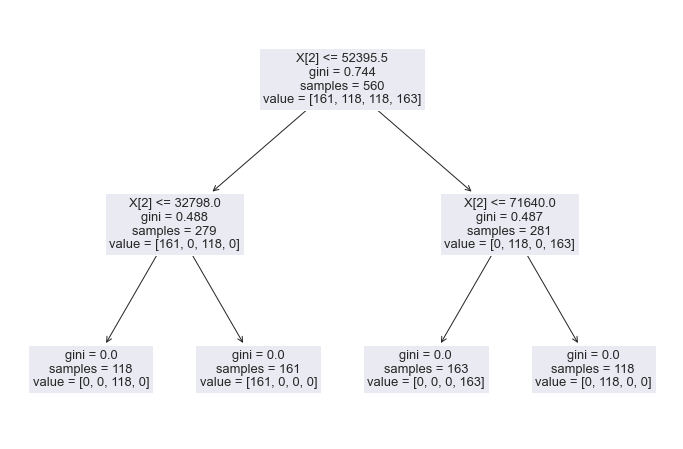

In [117]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(DT.fit(X_test, y_test)) 

# Random Forest

In [118]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [119]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [120]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_jobs=2)

In [121]:
# Varifying CV Score
CV=cross_val_score(RF,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[0.99702381 0.99702381 0.99702381 1.         0.99702381] 
 Score= 0.9976190476190476


In [122]:
before=time.time()
RF.fit(X_train,y_train)
after=time.time()

Pred_RF=RF.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.16105246543884277 sec


In [123]:
print(classification_report(y_test,Pred_RF,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_RF, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     1.0000    1.0000    1.0000       163

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

Accuracy is :1.0 
Training time is :0.16105246543884277 Sec.


# GradientBoostingClassifier

In [124]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [125]:
from sklearn import model_selection


X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [126]:
from sklearn.ensemble import GradientBoostingClassifier
GDB=GradientBoostingClassifier()

In [127]:
# Varifying CV Score
CV=cross_val_score(GDB,X_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[1.         0.99702381 1.         1.         0.99702381] 
 Score= 0.9988095238095237


In [128]:
before=time.time()
GDB.fit(X_train,y_train)
after=time.time()

Pred_GDB=GDB.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.6088786125183105 sec


In [129]:
print(classification_report(y_test,Pred_GDB,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_GDB, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     1.0000    1.0000    1.0000       163

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

Accuracy is :1.0 
Training time is :0.6088786125183105 Sec.


# LOGISTIC REGRESSION

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [109]:
df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)

In [111]:
log_reg = LogisticRegression()

In [112]:
# Varifying CV Score
CV=cross_val_score(log_reg,x_train,y_train,cv=5)
print(f"{CV} \n Score= {np.mean(CV)}")

[0.66964286 0.61904762 0.45833333 0.61011905 0.67857143] 
 Score= 0.6071428571428571


In [114]:
before=time.time()
log_reg.fit(x_train,y_train)
after=time.time()

Pred_log_reg=log_reg.predict(x_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.032929182052612305 sec


In [115]:
print(classification_report(y_test,Pred_log_reg,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_log_reg, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     0.4554    0.6025    0.5187       161
           2     0.6412    0.7119    0.6747       118
           3     0.5610    0.3898    0.4600       118
           4     0.5522    0.4540    0.4983       163

    accuracy                         0.5375       560
   macro avg     0.5525    0.5395    0.5379       560
weighted avg     0.5450    0.5375    0.5333       560

Accuracy is :0.5375 
Training time is :0.032929182052612305 Sec.


# SVM (Support vector machine)

In [143]:

df_model=final_df_model.copy()
x = df_model.drop('cluster', axis=1)
y = df_model['cluster']

In [144]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.25,random_state=5)

In [145]:
# import Support Vector Classifier
from sklearn.svm import SVC

Svc=SVC(probability=True, kernel='linear')

In [146]:
# Varifying CV Score
CV=cross_val_score(Svc,X_train,y_train,cv=5,n_jobs=2)
print(f"{CV} \n Score= {np.mean(CV)}")

[0.99702381 0.99702381 0.99702381 0.99702381 1.        ] 
 Score= 0.9976190476190476


In [147]:
before=time.time()
Svc.fit(X_train,y_train)
after=time.time()

Pred_Svc=Svc.predict(X_test)

exc_time=after-before
print(f"Training time is :{exc_time} sec")

Training time is :0.03233146667480469 sec


In [148]:
print(classification_report(y_test,Pred_Svc,digits=4))
print(f'Accuracy is :{accuracy_score(y_test,Pred_Svc, normalize=True)} \nTraining time is :{exc_time} Sec.')

              precision    recall  f1-score   support

           1     1.0000    1.0000    1.0000       161
           2     1.0000    1.0000    1.0000       118
           3     1.0000    1.0000    1.0000       118
           4     1.0000    1.0000    1.0000       163

    accuracy                         1.0000       560
   macro avg     1.0000    1.0000    1.0000       560
weighted avg     1.0000    1.0000    1.0000       560

Accuracy is :1.0 
Training time is :0.03233146667480469 Sec.


# Pickling The Model file For Deployment

# AdaBoost

In [107]:
import pickle
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [101]:
pickle.dump(ADB,open('AdaBoostmodel.pkl','wb')) # AdaBoost

In [102]:
pickled_model=pickle.load(open('AdaBoostmodel.pkl','rb'))

In [115]:
predictions = pickled_model.predict(x)

In [116]:
predictions

array([4, 1, 4, ..., 4, 4, 4])